In [1]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import tensorflow as tf
from six.moves import range
import numpy as np
import os
import sys

from IPython.display import display, Image
import matplotlib.pyplot as plt
# Config the matlotlib backend as plotting inline in IPython
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.contrib import keras
from keras import models, layers, losses, optimizers, metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from keras import optimizers

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


<IPython.core.display.Javascript object>


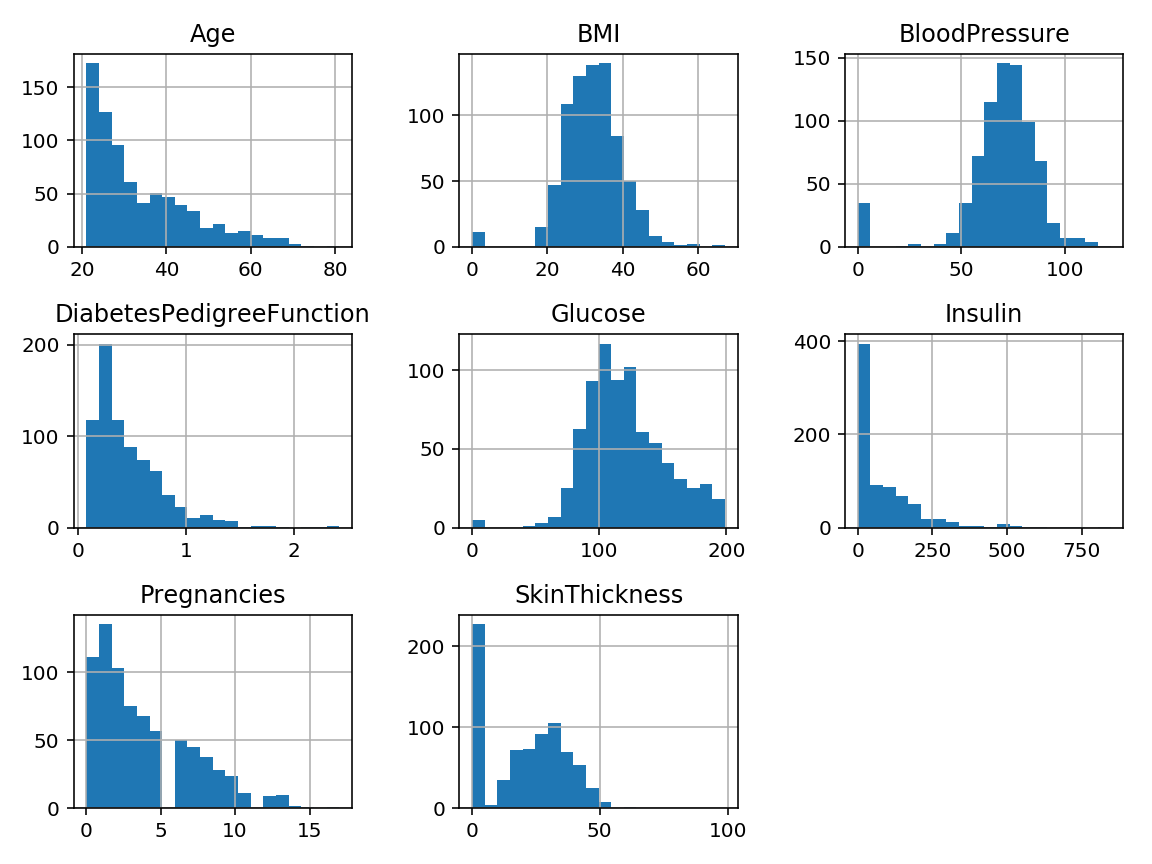

In [3]:
%matplotlib notebook
df = pd.read_csv('diabetes.csv')
a = df.corr().sort_values(by = 'Outcome', ascending = False)


X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
X.hist(figsize = (8, 6), bins = 20)
plt.tight_layout()


<IPython.core.display.Javascript object>


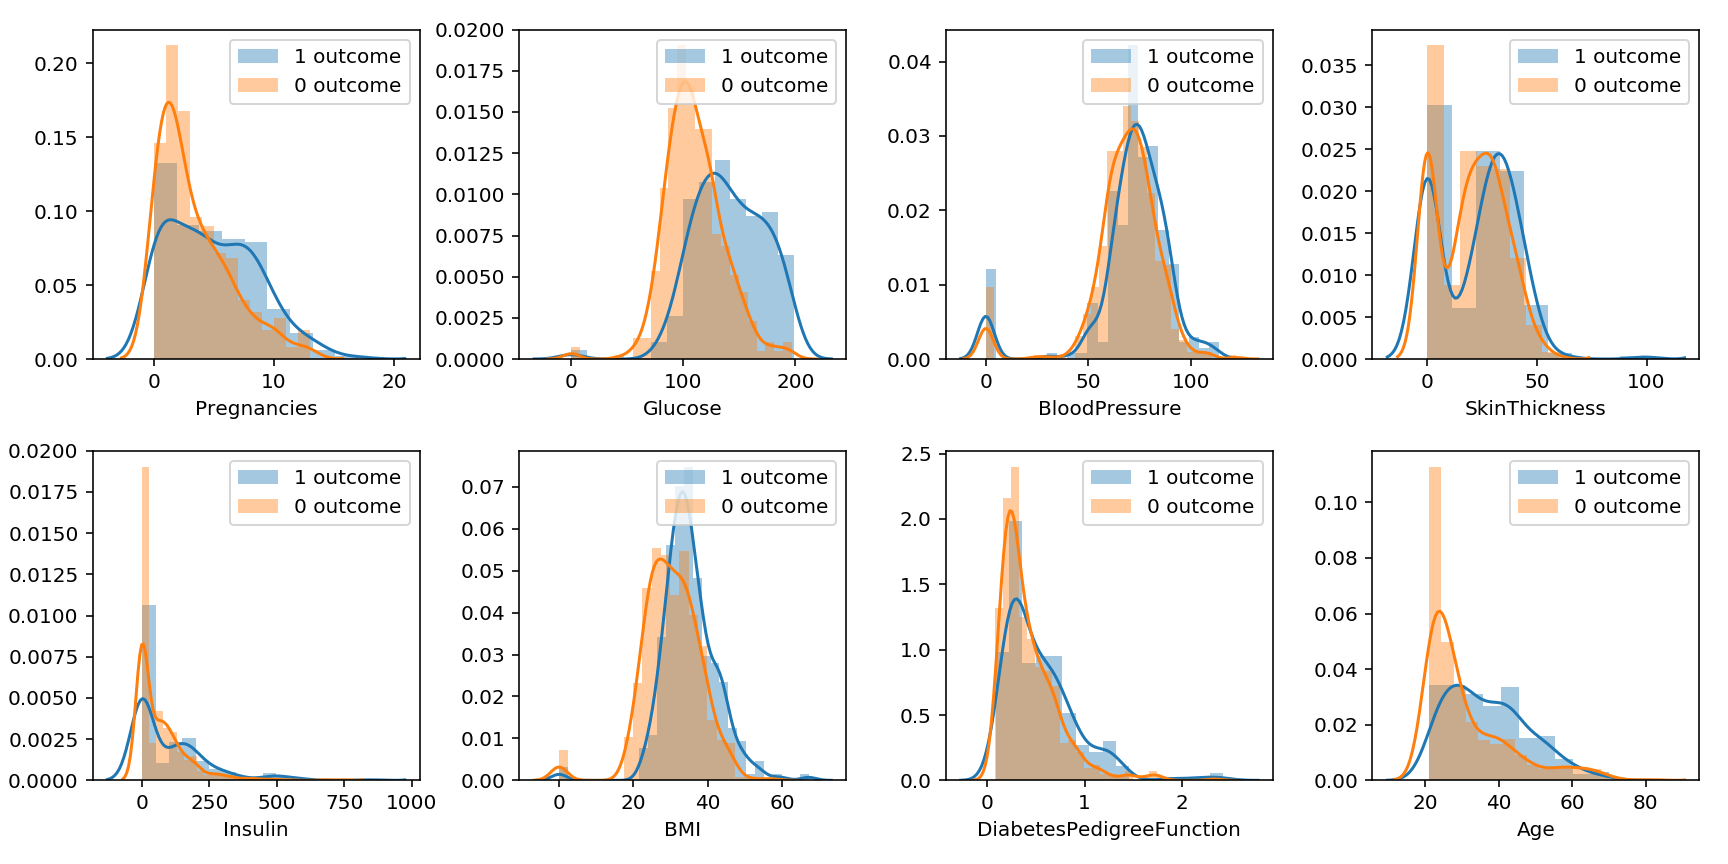

In [7]:
%matplotlib notebook
X_1 = df[df['Outcome'] == 1]
X_0 = df[df['Outcome'] == 0]
X_1, X_0 = X_1.iloc[:, 0:8], X_0.iloc[:, 0:8]
f, subax = plt.subplots(2, 4, figsize = (12, 6))
subaxes = [subax[i, j] for i in range(0,2) for j in range(0, 4)]

for col, ax in zip(range(0,X_1.shape[1]), subaxes):
    sns.distplot(X_1.iloc[:, col], ax = ax, label = '1 outcome')
    sns.distplot(X_0.iloc[:, col], ax = ax, label = '0 outcome')
#sns.distplot(X_0['Pregnancies'], ax = subax[0, 0], label = '0 outcome')
    ax.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


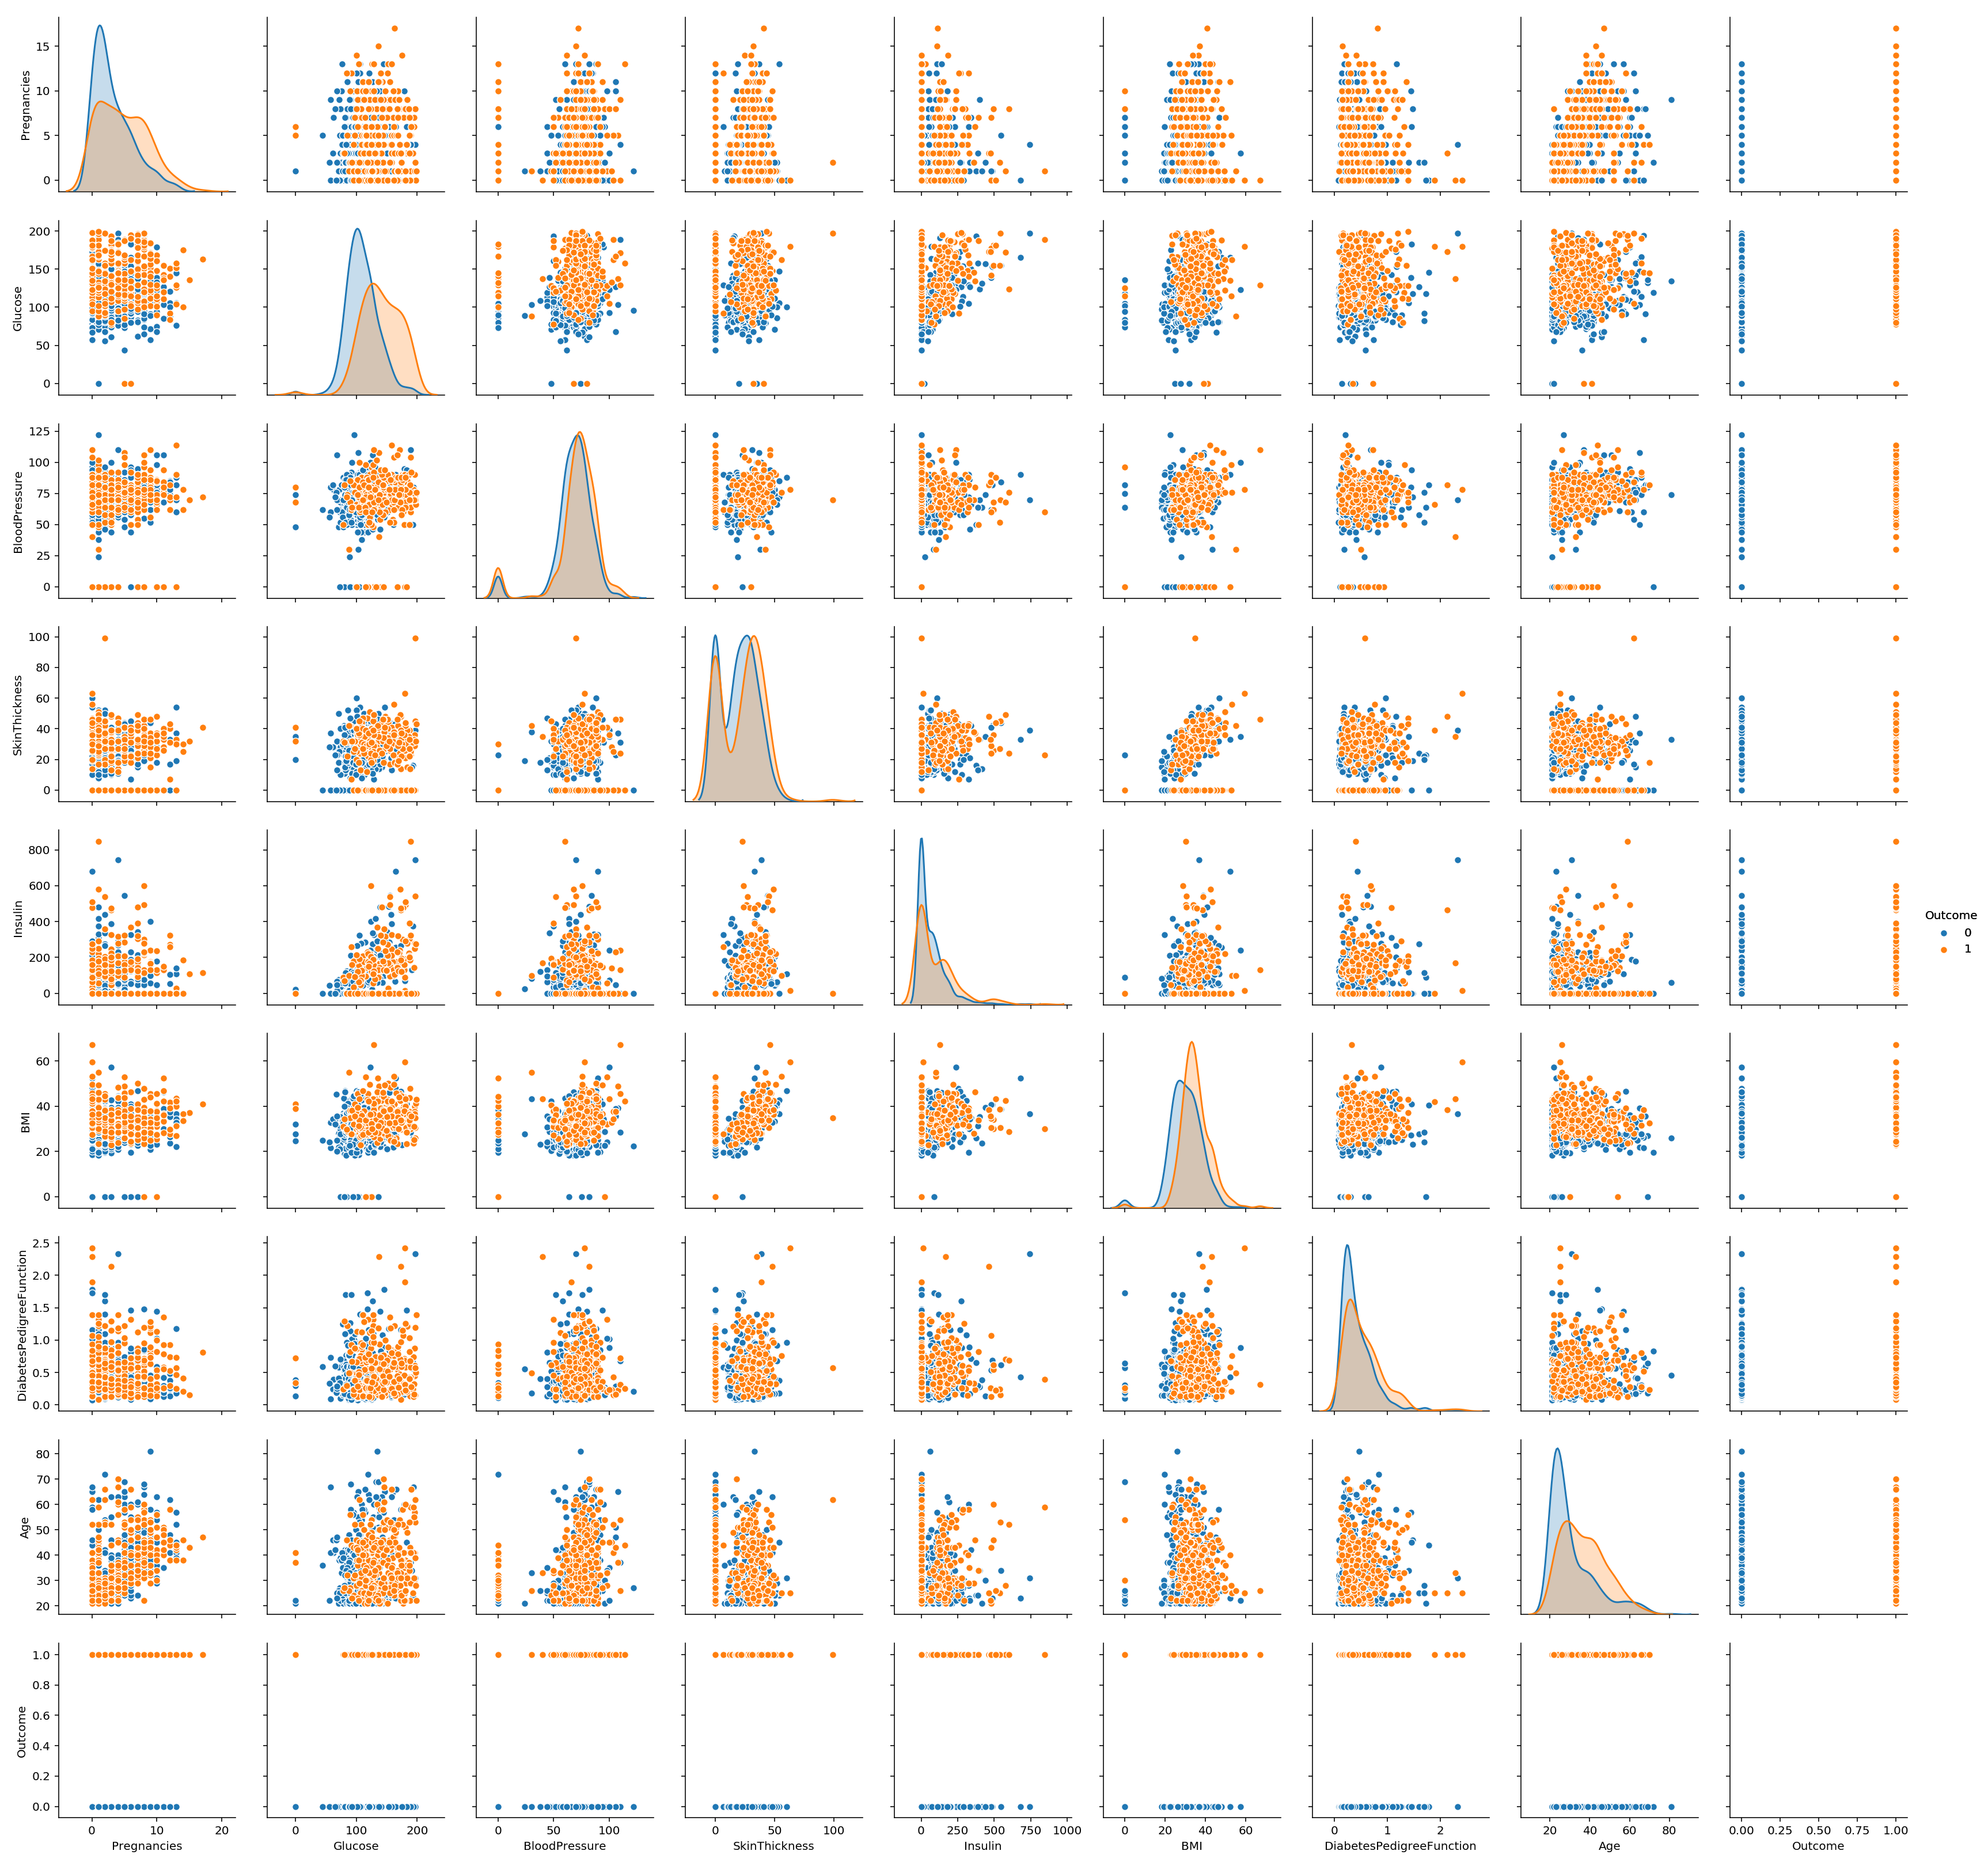

In [8]:
g = sns.pairplot(df, hue='Outcome', diag_kind='kde')
g.add_legend()

/Users/rtavakoli20/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
# Hyperparameters
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)
np.random.seed(7)
model = Sequential()
model.add(Dense(8, input_dim = 8, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_scaled, y, epochs = 400, batch_size = 12, validation_split = 0.1)

/Users/rtavakoli20/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/rtavakoli20/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train on 691 samples, validate on 77 samples
Epoch 1/400
691/691 [==============================]691/691 [==============================] - 0s 512us/step - loss: 0.6579 - acc: 0.6570 - val_loss: 0.6925 - val_acc: 0.5974

Epoch 2/400
691/691 [==============================]691/691 [==============================] - 0s 166us/step - loss: 0.6500 - acc: 0.6570 - val_loss: 0.6726 - val_acc: 0.5974

Epoch 3/400
691/691 [==============================]691/691 [==============================] - 0s 149us/step - loss: 0.6400 - acc: 0.6570 - val_loss: 0.6680 - val_acc: 0.5974

Epoch 4/400
691/691 [==============================]691/691 [==============================] - 0s 166us/step - loss: 0.6300 - acc: 0.6570 - val_loss: 0.6549 - val_acc: 0.5974

Epoch 5/400
691/691 [==============================]691/691 [==============================] - 0s 176us/step - loss: 0.6157 - acc: 0.6614 - val_loss: 0.6291 - val_acc: 0.6104

Epoch 6/400
691/691 [==============================]691/691 [==============

691/691 [==============================]691/691 [==============================] - 0s 164us/step - loss: 0.4504 - acc: 0.7916 - val_loss: 0.4752 - val_acc: 0.8442

Epoch 48/400
691/691 [==============================]691/691 [==============================] - 0s 148us/step - loss: 0.4476 - acc: 0.7858 - val_loss: 0.4850 - val_acc: 0.8052

Epoch 49/400
691/691 [==============================]691/691 [==============================] - 0s 146us/step - loss: 0.4479 - acc: 0.7815 - val_loss: 0.4857 - val_acc: 0.8182

Epoch 50/400
691/691 [==============================]691/691 [==============================] - 0s 164us/step - loss: 0.4494 - acc: 0.7858 - val_loss: 0.4821 - val_acc: 0.8182

Epoch 51/400
691/691 [==============================]691/691 [==============================] - 0s 200us/step - loss: 0.4491 - acc: 0.7844 - val_loss: 0.4805 - val_acc: 0.8182

Epoch 52/400
691/691 [==============================]691/691 [==============================] - 0s 218us/step - loss: 0.4465 - a

691/691 [==============================]691/691 [==============================] - 0s 240us/step - loss: 0.4396 - acc: 0.7800 - val_loss: 0.4962 - val_acc: 0.7922

Epoch 94/400
691/691 [==============================]691/691 [==============================] - 0s 206us/step - loss: 0.4351 - acc: 0.7858 - val_loss: 0.4747 - val_acc: 0.8182

Epoch 95/400
691/691 [==============================]691/691 [==============================] - 0s 229us/step - loss: 0.4439 - acc: 0.7916 - val_loss: 0.4751 - val_acc: 0.8312

Epoch 96/400
691/691 [==============================]691/691 [==============================] - 0s 222us/step - loss: 0.4418 - acc: 0.7945 - val_loss: 0.4762 - val_acc: 0.8312

Epoch 97/400
691/691 [==============================]691/691 [==============================] - 0s 230us/step - loss: 0.4369 - acc: 0.7887 - val_loss: 0.4753 - val_acc: 0.8312

Epoch 98/400
691/691 [==============================]691/691 [==============================] - 0s 142us/step - loss: 0.4390 - a

691/691 [==============================]691/691 [==============================] - 0s 228us/step - loss: 0.4311 - acc: 0.7974 - val_loss: 0.4733 - val_acc: 0.8442

Epoch 140/400
691/691 [==============================]691/691 [==============================] - 0s 155us/step - loss: 0.4284 - acc: 0.7887 - val_loss: 0.4747 - val_acc: 0.8312

Epoch 141/400
691/691 [==============================]691/691 [==============================] - 0s 143us/step - loss: 0.4355 - acc: 0.7916 - val_loss: 0.4836 - val_acc: 0.8182

Epoch 142/400
691/691 [==============================]691/691 [==============================] - 0s 147us/step - loss: 0.4313 - acc: 0.7931 - val_loss: 0.4806 - val_acc: 0.8312

Epoch 143/400
691/691 [==============================]691/691 [==============================] - 0s 143us/step - loss: 0.4294 - acc: 0.7945 - val_loss: 0.4735 - val_acc: 0.8442

Epoch 144/400
691/691 [==============================]691/691 [==============================] - 0s 219us/step - loss: 0.429

691/691 [==============================]691/691 [==============================] - 0s 227us/step - loss: 0.4209 - acc: 0.8017 - val_loss: 0.4805 - val_acc: 0.8182

Epoch 186/400
691/691 [==============================]691/691 [==============================] - 0s 196us/step - loss: 0.4232 - acc: 0.7931 - val_loss: 0.4881 - val_acc: 0.8182

Epoch 187/400
691/691 [==============================]691/691 [==============================] - 0s 182us/step - loss: 0.4172 - acc: 0.8046 - val_loss: 0.4928 - val_acc: 0.8052

Epoch 188/400
691/691 [==============================]691/691 [==============================] - 0s 177us/step - loss: 0.4197 - acc: 0.7959 - val_loss: 0.4843 - val_acc: 0.8182

Epoch 189/400
691/691 [==============================]691/691 [==============================] - 0s 251us/step - loss: 0.4217 - acc: 0.7916 - val_loss: 0.4825 - val_acc: 0.8052

Epoch 190/400
691/691 [==============================]691/691 [==============================] - 0s 183us/step - loss: 0.416


Epoch 231/400
691/691 [==============================]691/691 [==============================] - 0s 220us/step - loss: 0.4066 - acc: 0.8090 - val_loss: 0.4801 - val_acc: 0.8442

Epoch 232/400
691/691 [==============================]691/691 [==============================] - 0s 144us/step - loss: 0.4094 - acc: 0.8119 - val_loss: 0.4823 - val_acc: 0.8312

Epoch 233/400
691/691 [==============================]691/691 [==============================] - 0s 144us/step - loss: 0.4082 - acc: 0.8003 - val_loss: 0.4822 - val_acc: 0.8312

Epoch 234/400
691/691 [==============================]691/691 [==============================] - 0s 149us/step - loss: 0.4079 - acc: 0.8133 - val_loss: 0.4821 - val_acc: 0.8312

Epoch 235/400
691/691 [==============================]691/691 [==============================] - 0s 253us/step - loss: 0.4063 - acc: 0.8133 - val_loss: 0.4869 - val_acc: 0.8052

Epoch 236/400
691/691 [==============================]691/691 [==============================] - 0s 207us/ste

691/691 [==============================]691/691 [==============================] - 0s 306us/step - loss: 0.3978 - acc: 0.8119 - val_loss: 0.4855 - val_acc: 0.8312

Epoch 278/400
691/691 [==============================]691/691 [==============================] - 0s 232us/step - loss: 0.3959 - acc: 0.8191 - val_loss: 0.4971 - val_acc: 0.8052

Epoch 279/400
691/691 [==============================]691/691 [==============================] - 0s 209us/step - loss: 0.3950 - acc: 0.8119 - val_loss: 0.4856 - val_acc: 0.8442

Epoch 280/400
691/691 [==============================]691/691 [==============================] - 0s 215us/step - loss: 0.3987 - acc: 0.8177 - val_loss: 0.4838 - val_acc: 0.8442

Epoch 281/400
691/691 [==============================]691/691 [==============================] - 0s 256us/step - loss: 0.3983 - acc: 0.8249 - val_loss: 0.4841 - val_acc: 0.8312

Epoch 282/400
691/691 [==============================]691/691 [==============================] - 0s 256us/step - loss: 0.397

691/691 [==============================]691/691 [==============================] - 0s 179us/step - loss: 0.3940 - acc: 0.8205 - val_loss: 0.4872 - val_acc: 0.8442

Epoch 324/400
691/691 [==============================]691/691 [==============================] - 0s 168us/step - loss: 0.3881 - acc: 0.8177 - val_loss: 0.4853 - val_acc: 0.8571

Epoch 325/400
691/691 [==============================]691/691 [==============================] - 0s 211us/step - loss: 0.3906 - acc: 0.8191 - val_loss: 0.4938 - val_acc: 0.8442

Epoch 326/400
691/691 [==============================]691/691 [==============================] - 0s 214us/step - loss: 0.3861 - acc: 0.8249 - val_loss: 0.4864 - val_acc: 0.8571

Epoch 327/400
691/691 [==============================]691/691 [==============================] - 0s 342us/step - loss: 0.3961 - acc: 0.8177 - val_loss: 0.4900 - val_acc: 0.8312

Epoch 328/400
691/691 [==============================]691/691 [==============================] - 0s 260us/step - loss: 0.384

691/691 [==============================]691/691 [==============================] - 0s 233us/step - loss: 0.3867 - acc: 0.8177 - val_loss: 0.5021 - val_acc: 0.8571

Epoch 370/400
691/691 [==============================]691/691 [==============================] - 0s 170us/step - loss: 0.3797 - acc: 0.8220 - val_loss: 0.4938 - val_acc: 0.8442

Epoch 371/400
691/691 [==============================]691/691 [==============================] - 0s 172us/step - loss: 0.3775 - acc: 0.8119 - val_loss: 0.4948 - val_acc: 0.8442

Epoch 372/400
691/691 [==============================]691/691 [==============================] - 0s 156us/step - loss: 0.3757 - acc: 0.8220 - val_loss: 0.5055 - val_acc: 0.8312

Epoch 373/400
691/691 [==============================]691/691 [==============================] - 0s 209us/step - loss: 0.3764 - acc: 0.8162 - val_loss: 0.4977 - val_acc: 0.8571

Epoch 374/400
691/691 [==============================]691/691 [==============================] - 0s 209us/step - loss: 0.377